In [12]:
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm, tnrange

In [2]:
def sig(x, forward=True):
    if forward:
        return 1 / (1 + np.exp(-x))
    else: # this is the derivative of sigmoid (for backprop)
        return x * (1. - x)

In [3]:
def nn_forward(inpt, w1, w2):
    # LAYER 1 ################
    l1 = np.matmul(inpt, w1)
    l1_sig = sig(l1)
    # LAYER 2 ################
    l2 = np.matmul(l1_sig, w2)

    return l2, l1_sig, l1

In [4]:
def loss(pred, truth):
    return .5 * np.square(pred - truth)

In [5]:
def nn_backward(inpt, l1, l1_sig, l2, target, learning_rate):
    do = np.zeros(l2.shape[0])
    dh = np.zeros(l1.shape[0])

    # OUTPUT LAYER ##############################
        # calculate error signal for output layer
    do = (l2 - target)

        # update gradients for output layer
    for j in range(w2g.shape[0]):
        w2g[j] = do * l1_sig[j]

        # update weights for output layer
    for j in range(w2g.shape[0]):
        w2[j] -= learning_rate * w2g[j]

    # HIDDEN LAYER ##############################
        # calculate error signal for hidden layer
    for j in range(dh.shape[0]):
        dh[j] = sig(l1_sig[j], forward=False) * do * w2[j]

        # update gradients for hidden layer
    for j in range(w1g.shape[1]):
        w1g[0,j] = dh[j] * inpt

        # update weights for hidden layer
    for j in range(w1g.shape[1]):
        w1[0,j] -= learning_rate * w1g[0,j]

In [6]:
# data
x = np.linspace(start=0, stop=2 * np.pi, num=20)
y = np.sin(x)

In [13]:
w1 = np.random.randn(1,300)
w2 = np.random.randn(300,1)

w1g = np.zeros(w1.shape)
w2g = np.zeros(w2.shape)

ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

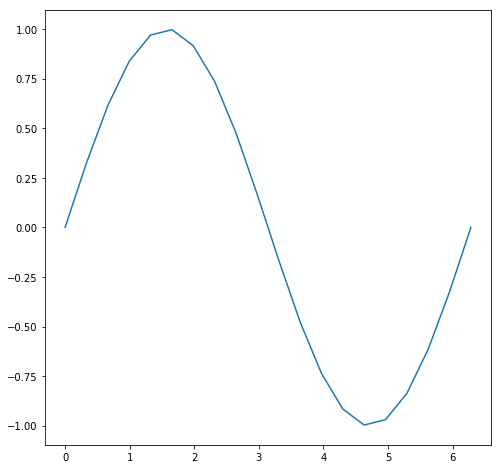

In [17]:
# pre train plotting
pre_train = []
for i in range(x.shape[0]):
    pre_train.append(nn_forward([x[i]], w1, w2)[0][0])

plt.figure(figsize=(8,8))
    
plt.plot(x, y, label='groudtruth')
plt.plot(x, pre_train, label='untrained preds')

plt.legend()
plt.show()

In [15]:
# training
num_epochs = 1000
learning_rate = 0.001
loss_hist = []

for i in tnrange(num_epochs):
    for idx in range(x.shape[0]):
        sample = np.array([x[idx]])
        target = np.array([y[idx]])

        l2, l1_sig, l1 = nn_forward(sample, w1, w2)

        nn_backward(sample, l1, l1_sig, l2, target, learning_rate)

    loss_hist.append(loss(l2, target))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

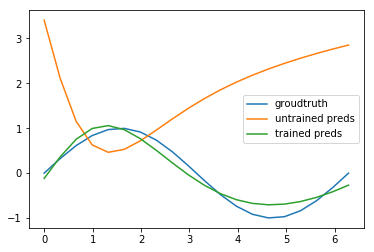

In [16]:
# post train plotting
post_train = []
for i in range(x.shape[0]):
    post_train.append(nn_forward([x[i]], w1, w2)[0][0])

plt.figure(figsize=(8,8))

plt.plot(x, y, label='groudtruth')
plt.plot(x, pre_train, label='untrained preds')
plt.plot(x, post_train, label='trained preds')

plt.legend()
plt.show()